<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/Data_science_practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Create an overfitting model which we will be improving by reducing its complexity, adding regularization parameters, or increasing training data.

In [10]:
# prompt: build a model that has a low bias and high variance and create solutions to it

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data with noise
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))  # Introduce more noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# prompt: print x and y shape and their types

print("Shape of X:", X.shape)
print("Type of X:", X.dtype)
print("Shape of y:", y.shape)
print("Type of y:", y.dtype)

Shape of X: (80, 1)
Type of X: float64
Shape of y: (80,)
Type of y: float64


In [12]:
#show a slice of x and y
print("First 5 values of X:\n",X[:5])
print("First 5 values of y:\n",y[:5])

First 5 values of X:
 [[0.093949  ]
 [0.10109199]
 [0.19593896]
 [0.30112736]
 [0.35518029]]
First 5 values of y:
 [0.27582768 0.10091989 0.19468762 0.29659703 0.34775941]


In [5]:
# prompt: create a numpy array of 10 elements

import numpy as np

# Create a NumPy array of 10 elements
x = np.arange(10)

print(x)

[0 1 2 3 4 5 6 7 8 9]


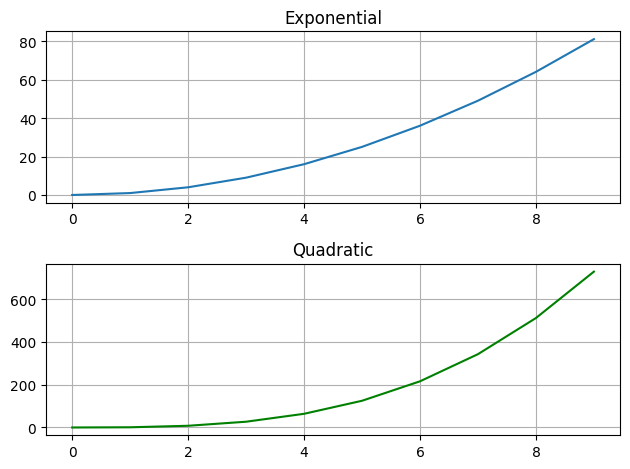

In [11]:
import matplotlib.pyplot as plt

y = x ** 2

y2 = x ** 3

plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Exponential')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(x, y2, color='green')
plt.title('Quadratic')

plt.tight_layout()
plt.grid(True)
plt.show()


In [13]:
# High variance, low bias model (high degree polynomial)
degree = 15 # High degree leads to overfitting
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)


# Predict on training and test data
y_train_pred = poly_regressor.predict(X_train_poly)
y_test_pred = poly_regressor.predict(X_test_poly)


# Calculate the errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Training Error (High Variance Model): {train_error}")
print(f"Testing Error (High Variance Model): {test_error}")




Training Error (High Variance Model): 0.0059051303155156195
Testing Error (High Variance Model): 0.04158274026391759


In [14]:

print("Shape of X_train_poly:", X_train_poly.shape)


Shape of X_train_poly: (64, 16)


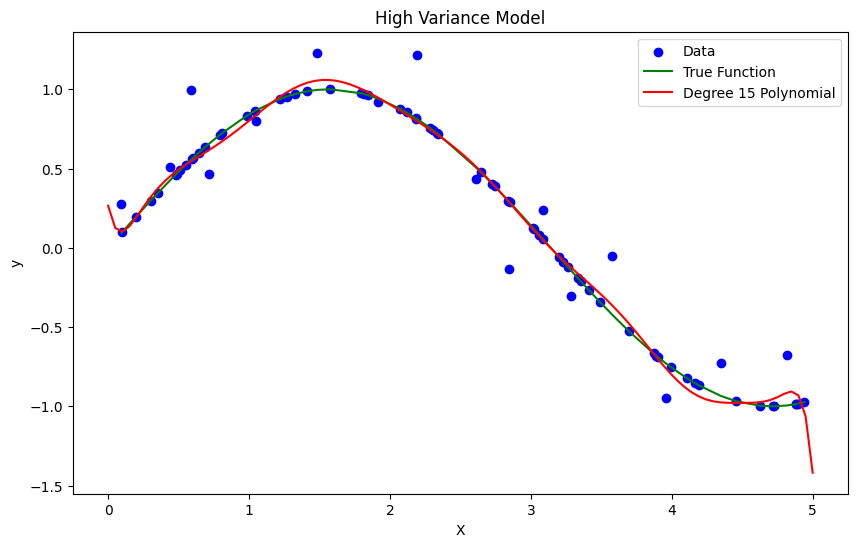

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.sin(X), color='green', label='True Function') # The underlying function

X_plot = np.linspace(0, 5, 100).reshape(-1, 1)  # points to plot predictions
X_plot_poly = poly.transform(X_plot)
plt.plot(X_plot, poly_regressor.predict(X_plot_poly), color='red', label=f'Degree {degree} Polynomial')

plt.xlabel('X')
plt.ylabel('y')
plt.title('High Variance Model')
plt.legend()
plt.show()


In [17]:


# Solutions for High Variance (Overfitting)

# 1. Regularization (L1 or L2): Adds a penalty to large coefficients
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=1)  # alpha controls regularization strength
ridge_regressor.fit(X_train_poly, y_train)
y_ridge_pred = ridge_regressor.predict(X_test_poly)
print(f"Test Error (Ridge Regression): {mean_squared_error(y_test, y_ridge_pred)}")


Test Error (Ridge Regression): 0.040736012181810534


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.24809e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [18]:

# 2. Cross-Validation: Use techniques like k-fold to better evaluate performance
# 3. Feature Selection: Reduce the number of features used in the model
# 4. More Data:  Increasing the amount of training data can help

# 5. Reduce Model Complexity: Use a simpler model (lower degree polynomial, fewer layers in a neural network).
# Example (Lower-degree polynomial)
degree_low = 3
poly_low = PolynomialFeatures(degree=degree_low)
X_train_low = poly_low.fit_transform(X_train)
X_test_low = poly_low.transform(X_test)
low_poly_regressor = LinearRegression()
low_poly_regressor.fit(X_train_low, y_train)

y_low_pred = low_poly_regressor.predict(X_test_low)
print(f"Test Error (Lower Degree Polynomial): {mean_squared_error(y_test, y_low_pred)}")



Test Error (Lower Degree Polynomial): 0.0458895042826795


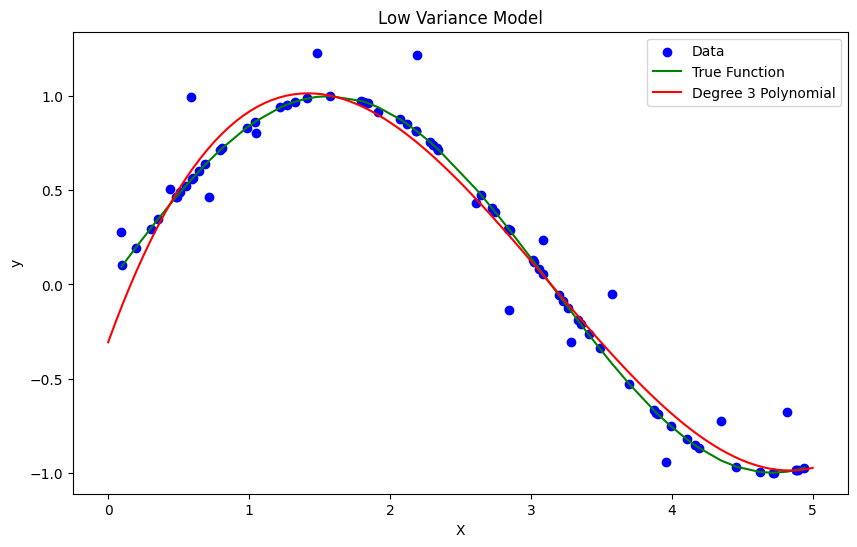

In [19]:
# prompt: create the same plot you created for the polynomial with 15 degress for our new polynomial model (low_poly_regressor) with 3 degrees..

# Plotting the results for the low degree polynomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.sin(X), color='green', label='True Function') # The underlying function

X_plot = np.linspace(0, 5, 100).reshape(-1, 1)  # points to plot predictions
X_plot_low = poly_low.transform(X_plot) # Use poly_low for the low degree polynomial
plt.plot(X_plot, low_poly_regressor.predict(X_plot_low), color='red', label=f'Degree {degree_low} Polynomial')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Low Variance Model') # Changed the title to reflect the model
plt.legend()
plt.show()

### High bias (underfitting) fix


Test Error (Feature Selection): 0.03854391512277591


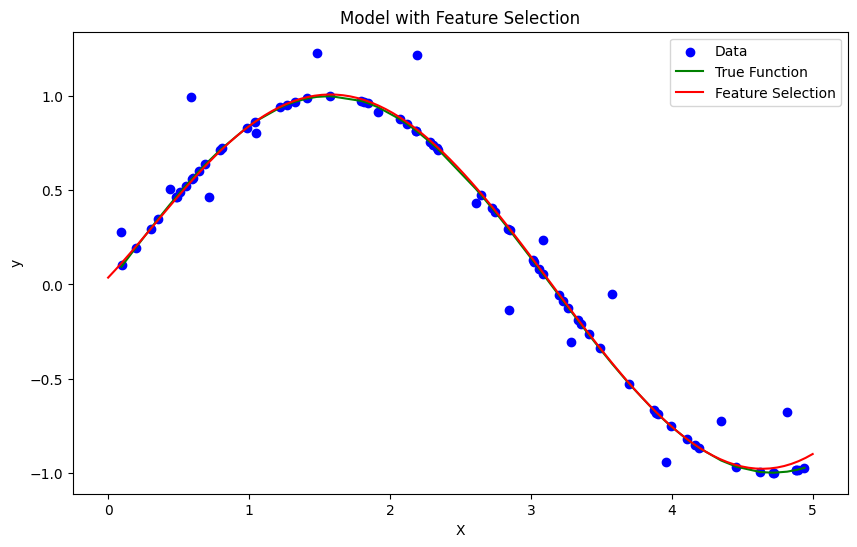

In [20]:
# prompt: # prompt: build a model that has a low variance and high bias and create solutions to it

# Solution 3: Feature Selection (Example using SelectKBest)
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features
k_best = 5  # Choose the number of best features
selector = SelectKBest(score_func=f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Train a new model with the selected features
selected_regressor = LinearRegression()
selected_regressor.fit(X_train_selected, y_train)

# Predict and evaluate
y_selected_pred = selected_regressor.predict(X_test_selected)
selected_error = mean_squared_error(y_test, y_selected_pred)
print(f"Test Error (Feature Selection): {selected_error}")


# Plotting the results for the feature selection model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, np.sin(X), color='green', label='True Function')

# Transform X_plot using the same polynomial features and feature selection
X_plot_selected = selector.transform(poly.transform(X_plot))

plt.plot(X_plot, selected_regressor.predict(X_plot_selected), color='red', label=f'Feature Selection')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Model with Feature Selection')
plt.legend()
plt.show()

### Analyzing linear separability

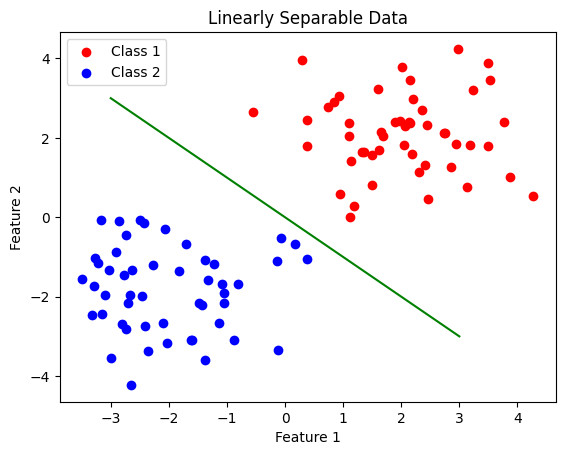

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate linearly separable data
np.random.seed(0)
x1 = np.random.normal(loc=2, scale=1, size=(50, 2))
x2 = np.random.normal(loc=-2, scale=1, size=(50, 2))

# Plot the data
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color='blue', label='Class 2')

# Plot the separating line
plt.plot([-3, 3], [3, -3], color='green')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linearly Separable Data')
plt.show()


In [7]:
plt.plot??